# Clustering - Cereals Dataset

## Import the required libraries

In [1]:
import pandas as pd
import numpy as np

##### Dataset Description
* name: Name of cereal
* calories: calories per serving
* protein: grams of protein
* fat: grams of fat
* sodium: milligrams of sodium
* fiber: grams of dietary fiber
* carbo: grams of complex carbohydrates
* sugars: grams of sugars
* potass: milligrams of potassium
* vitamins: vitamins and minerals - 0, 25, or 100, indicating the typical percentage of FDA recommended
* shelf: display shelf (1, 2, or 3, counting from the floor)
* weight: weight in ounces of one serving
* cups: number of cups in one serving
* rating: rating of the cereals (Possibly from Consumer Reports)

# Reading data

In [2]:
cereals = pd.read_csv("Cereals.csv")

# Data Understanding

### Get the shape of the data

In [3]:
cereals.shape

(77, 14)

### Get the top and bottom few rows of the data

In [4]:
cereals.head()

,name,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843


In [5]:
cereals.tail()

,name,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
72,Triples,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174
73,Trix,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301
74,Wheat_Chex,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445
75,Wheaties,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193
76,Wheaties_Honey_Gold,110,2,1,200,1.0,16.0,8.0,60.0,25,1,1.0,0.75,36.187559


### Check the data type of all the features

In [6]:
cereals.dtypes

name         object
calories      int64
protein       int64
fat           int64
sodium        int64
fiber       float64
carbo       float64
sugars      float64
potass      float64
vitamins      int64
shelf         int64
weight      float64
cups        float64
rating      float64
dtype: object

### Check summary statistics

In [7]:
cereals.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,76.000000,76.000000,75.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.802632,7.026316,98.666667,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,3.907326,4.378656,70.410636,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,15.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,42.500000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.500000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


### Check missing values

In [8]:
cereals.isnull().sum()

name        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       1
sugars      1
potass      2
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

# Data Pre-processing

### Aggregating "name", "shelf" and "rating" to make labels

### 100%_Bran (3 - 68.4)

In [9]:
cereals['label'] = cereals['name']+ ' (' + cereals['shelf'].astype(str) + " - " + \
                    round(cereals['rating'],2).astype(str) + ')'


In [10]:
cereals.drop(['name','shelf','rating'], axis=1, inplace=True)

In [11]:
cereals['label']

0                     100%_Bran (3 - 68.4)
1            100%_Natural_Bran (3 - 33.98)
2                     All-Bran (3 - 59.43)
3     All-Bran_with_Extra_Fiber (3 - 93.7)
4               Almond_Delight (3 - 34.38)
                      ...                 
72                     Triples (3 - 39.11)
73                        Trix (2 - 27.75)
74                  Wheat_Chex (1 - 49.79)
75                    Wheaties (1 - 51.59)
76         Wheaties_Honey_Gold (1 - 36.19)
Name: label, Length: 77, dtype: object

In [12]:
cereals.shape

(77, 12)

### Decouple label from the features

In [13]:
cereal_label = cereals['label']

## Select all columns except "label"

cereals.drop('label', axis=1, inplace=True)

### Imputation

from sklearn.preprocessing import Imputer

mean_imputer = Imputer(strategy='mean')
imputed_cereals = pd.DataFrame(mean_imputer.fit_transform(cereals),columns=cereals.columns)

In [14]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan , strategy = 'mean')
imputed_cereals=pd.DataFrame(imputer.fit_transform(cereals),columns=cereals.columns)

In [15]:
imputed_cereals.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups
0,70.0,4.0,1.0,130.0,10.0,5.0,6.0,280.000000,25.0,1.0,0.33
1,120.0,3.0,5.0,15.0,2.0,8.0,8.0,135.000000,0.0,1.0,1.00
2,70.0,4.0,1.0,260.0,9.0,7.0,5.0,320.000000,25.0,1.0,0.33
3,50.0,4.0,0.0,140.0,14.0,8.0,0.0,330.000000,25.0,1.0,0.50
4,110.0,2.0,2.0,200.0,1.0,14.0,8.0,98.666667,25.0,1.0,0.75


### Checking for NAs again

In [16]:
imputed_cereals.isnull().sum()

calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
weight      0
cups        0
dtype: int64

### Standardization

In [17]:
from sklearn.preprocessing import StandardScaler

standardizer = StandardScaler()
standardizer.fit(imputed_cereals)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [18]:
standardizer.mean_

array([106.88311688,   2.54545455,   1.01298701, 159.67532468,
         2.15194805,  14.80263158,   7.02631579,  98.66666667,
        28.24675325,   1.02961039,   0.82103896])

In [19]:
standardizer.var_

array([3.74700624e+02, 1.18299882e+00, 9.99831337e-01, 6.93658290e+03,
       5.60665205e+00, 1.48706425e+01, 1.86746411e+01, 4.76450216e+03,
       4.92705347e+02, 2.23491989e-02, 5.34534660e-02])

In [20]:
std_X = standardizer.transform(imputed_cereals)
std_cereals = pd.DataFrame(std_X, columns=imputed_cereals.columns)

In [21]:
std_cereals.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups
count,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01
mean,-8.398765e-17,2.018587e-17,8.583502e-17,5.767392e-18,9.155735e-17,-4.066012e-16,-2.000564e-16,-8.506904e-17,2.883696e-17,-1.881612e-16,1.492313e-16
std,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00
min,-2.938605e+00,-1.420902e+00,-1.013072e+00,-1.917189e+00,-9.088244e-01,-2.542013e+00,-1.625929e+00,-1.212115e+00,-1.272550e+00,-3.542628e+00,-2.469891e+00
25%,-3.555846e-01,-5.014948e-01,-1.013072e+00,-3.563056e-01,-4.864980e-01,-7.267769e-01,-9.317120e-01,-7.774919e-01,-1.462701e-01,-1.980675e-01,-6.532825e-01
50%,1.610194e-01,4.179123e-01,-1.298811e-02,2.440343e-01,-6.417167e-02,-4.606439e-16,-6.089621e-03,-1.255577e-01,-1.462701e-01,-1.980675e-01,-3.072619e-01
75%,1.610194e-01,4.179123e-01,9.870962e-01,6.042382e-01,3.581547e-01,5.698204e-01,9.195328e-01,3.090651e-01,-1.462701e-01,-1.980675e-01,7.740527e-01
max,2.744040e+00,3.176134e+00,3.987349e+00,1.924986e+00,5.003745e+00,2.125737e+00,1.845155e+00,3.351425e+00,3.232570e+00,3.146493e+00,2.936682e+00


#### Note - Clustering is an unsupervised method and hence we are not concerned about train-test split or prediction accuracies.

# Agglomerative Clustering

<IPython.core.display.Javascript object>


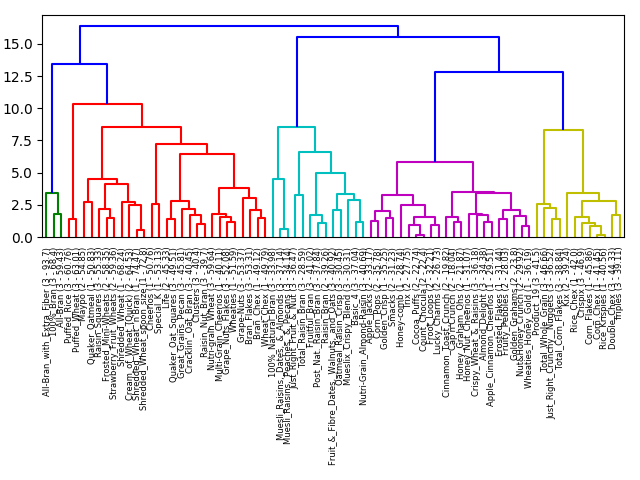

In [22]:
import matplotlib.pyplot as plt
%matplotlib notebook

from scipy.cluster.hierarchy import linkage, dendrogram

# Preparing linkage matrix
linkage_matrix = linkage(std_cereals, method='ward',metric='euclidean')

dendrogram(linkage_matrix,labels=cereal_label.values)
plt.tight_layout()
plt.show()

In [23]:
from sklearn.cluster import AgglomerativeClustering

## Instantiating object
agg_clust = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')

## Training model and return class labels
agg_clusters = agg_clust.fit_predict(std_cereals)

## Label - Cluster
agg_result = pd.DataFrame({"label":cereal_label,"agg_cluster":agg_clusters}).sort_values('agg_cluster')
agg_result.head()

,label,agg_cluster
49,Nutri-Grain_Almond-Raisin (3 - 40.69),0
1,100%_Natural_Bran (3 - 33.98),0
46,Mueslix_Crispy_Blend (3 - 30.31),0
45,"Muesli_Raisins,_Peaches,_&_Pecans (3 - 34.14)",0
44,"Muesli_Raisins,_Dates,_&_Almonds (3 - 37.14)",0


In [24]:
agg_result.tail()

,label,agg_cluster
37,Honey-comb (1 - 28.74),4
48,Nut&Honey_Crunch (2 - 29.92),4
76,Wheaties_Honey_Gold (1 - 36.19),4
55,Puffed_Wheat (3 - 63.01),5
54,Puffed_Rice (3 - 60.76),5


In [25]:
agg_clusters

array([3, 0, 3, 3, 4, 4, 4, 0, 2, 2, 4, 2, 4, 2, 4, 1, 1, 4, 4, 2, 2, 1,
       4, 1, 4, 4, 2, 0, 0, 4, 4, 4, 2, 2, 2, 4, 4, 4, 1, 0, 1, 2, 4, 2,
       0, 0, 0, 2, 4, 0, 2, 0, 0, 1, 5, 5, 2, 2, 0, 2, 2, 1, 1, 2, 2, 2,
       4, 2, 2, 1, 0, 1, 1, 4, 2, 2, 4])

# K-Means Clustering

#### Simple Example to implement KMeans clustering algorithm using sklearn.cluster

In [26]:
from sklearn.cluster import KMeans

X = np.array([[1, 2], [1, 4], [1, 0],
              [4, 2], [4, 4], [4, 0]])

print(X)
Y = pd.DataFrame(X,columns=['A','B'])
print("\n")
print(Y)

kmeans = KMeans(n_clusters=2, random_state=2).fit(X)
kmeans.labels_

[[1 2]
 [1 4]
 [1 0]
 [4 2]
 [4 4]
 [4 0]]


   A  B
0  1  2
1  1  4
2  1  0
3  4  2
4  4  4
5  4  0


array([1, 1, 1, 0, 0, 0], dtype=int32)

In [27]:
kmeans.cluster_centers_

array([[4., 2.],
       [1., 2.]])

In [28]:
kmeans.predict([[0, 0], [4, 4]])

array([1, 0], dtype=int32)

In [29]:
kmeans.inertia_

16.0

In [30]:
kmeans_object = KMeans(n_clusters=5, random_state=1240)

kmeans_object.fit(std_cereals)
kmeans_clusters = kmeans_object.predict(std_cereals)

kmeans_results = pd.DataFrame({"label":cereal_label,"kmeans_cluster":kmeans_clusters})
kmeans_results.head()

,label,kmeans_cluster
0,100%_Bran (3 - 68.4),4
1,100%_Natural_Bran (3 - 33.98),2
2,All-Bran (3 - 59.43),4
3,All-Bran_with_Extra_Fiber (3 - 93.7),4
4,Almond_Delight (3 - 34.38),2


### Inspecting cluster centroids to understand average statistics of each cluster

In [31]:
# inverse_transform is used to Scale back the data to the original representation
cluster_centroids = pd.DataFrame(standardizer.inverse_transform(kmeans_object.cluster_centers_),columns=cereals.columns)   ## Using inverse_transform to retrive actual values from standardized data
cluster_centroids.to_csv("best_kmeans_cluster_centroids.csv")
cluster_centroids

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups
0,135.000000,3.166667,1.666667,180.416667,3.541667,15.625000,10.916667,172.083333,37.500000,1.287500,0.758333
1,105.294118,2.705882,0.529412,237.058824,1.176471,19.294118,3.000000,62.352941,42.647059,1.000000,1.002941
2,108.529412,2.058824,1.294118,161.029412,1.397059,12.661765,9.411765,74.078431,24.264706,1.000000,0.782353
3,85.454545,2.727273,0.272727,8.636364,2.063636,15.800239,2.547847,93.060606,9.090909,0.893636,0.846364
4,63.333333,4.000000,0.666667,176.666667,11.000000,6.666667,3.666667,310.000000,25.000000,1.000000,0.386667


In [32]:
wss= {}
for k in range(1, 21):
    kmeans_loop = KMeans(n_clusters=k,n_init=30,max_iter=300,random_state=1000,verbose=0).fit(std_cereals)
    clusters = kmeans_loop.labels_
    wss[k] = kmeans_loop.inertia_ # Inertia: Sum of squared distances of samples to their closest cluster center


In [33]:
wss

{1: 846.9999999999999,
 2: 686.4622338517573,
 3: 584.7237118058638,
 4: 489.39800731235425,
 5: 411.3455717184148,
 6: 353.7944614991775,
 7: 313.7732091181265,
 8: 276.2790231881626,
 9: 251.54461350300483,
 10: 225.14706141973497,
 11: 205.2850615233169,
 12: 185.39994937934736,
 13: 169.45822061569294,
 14: 156.69006024126602,
 15: 141.726492321529,
 16: 135.56593594429356,
 17: 126.49005822144409,
 18: 118.79712968347323,
 19: 115.3341003222298,
 20: 110.8519495242835}

In [34]:
wss.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

In [35]:
wss.values()

dict_values([846.9999999999999, 686.4622338517573, 584.7237118058638, 489.39800731235425, 411.3455717184148, 353.7944614991775, 313.7732091181265, 276.2790231881626, 251.54461350300483, 225.14706141973497, 205.2850615233169, 185.39994937934736, 169.45822061569294, 156.69006024126602, 141.726492321529, 135.56593594429356, 126.49005822144409, 118.79712968347323, 115.3341003222298, 110.8519495242835])

In [36]:
list(wss.keys())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

<IPython.core.display.Javascript object>


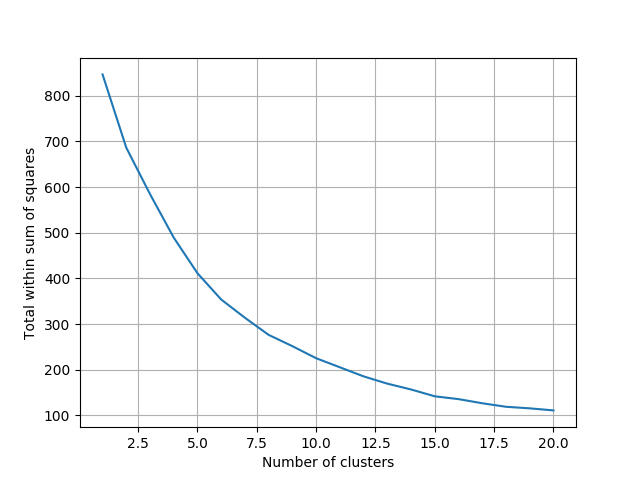

In [37]:
import matplotlib.pyplot as plt
plt.figure()

plt.plot(list(wss.keys()),list(wss.values()))
plt.grid()
plt.xlabel('Number of clusters')
plt.ylabel('Total within sum of squares')
plt.show()


### How to select best K value for K-Means -> Silhouette Analysis

<IPython.core.display.Javascript object>


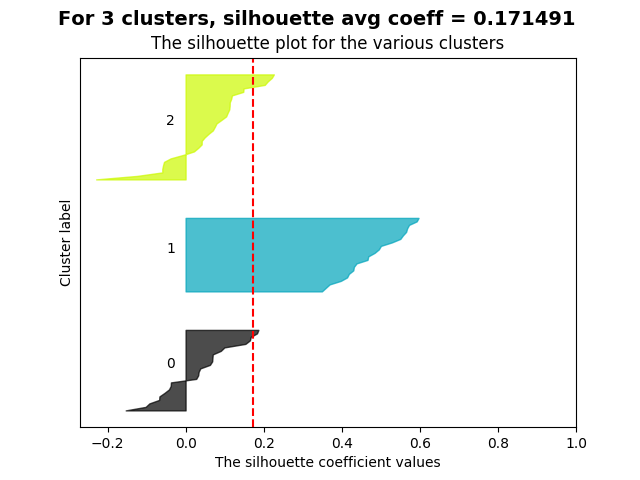

<IPython.core.display.Javascript object>


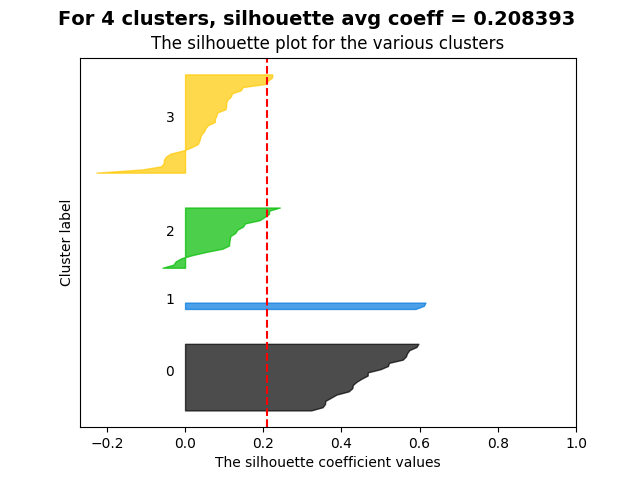

<IPython.core.display.Javascript object>


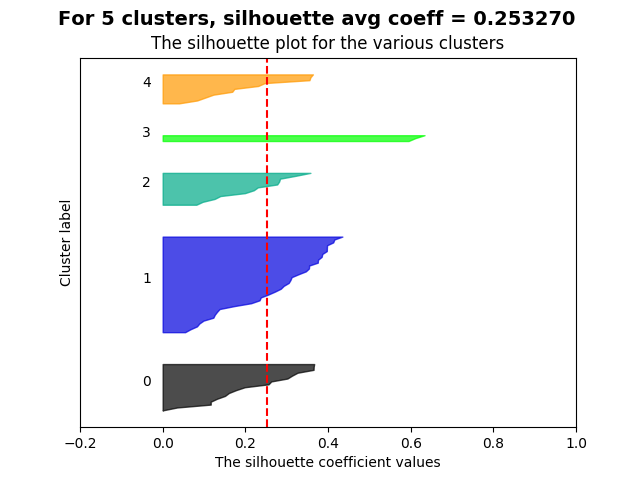

<IPython.core.display.Javascript object>


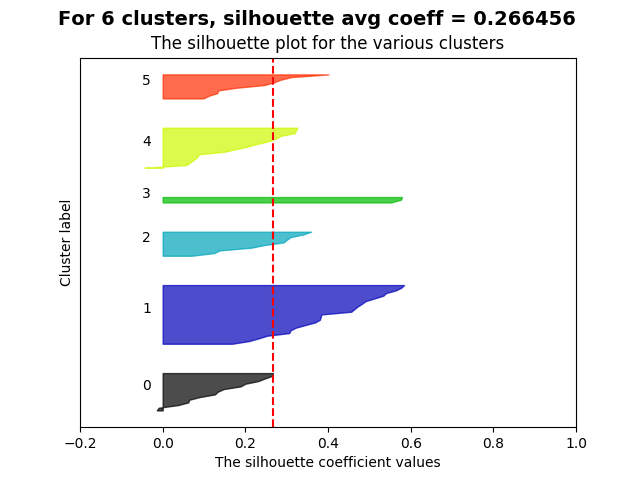

<IPython.core.display.Javascript object>


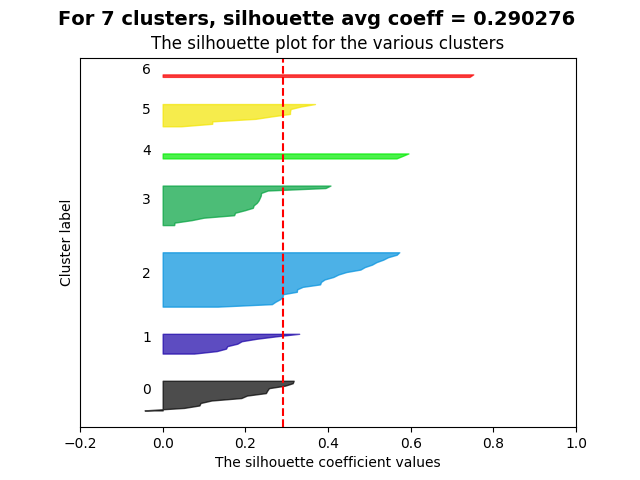

<IPython.core.display.Javascript object>


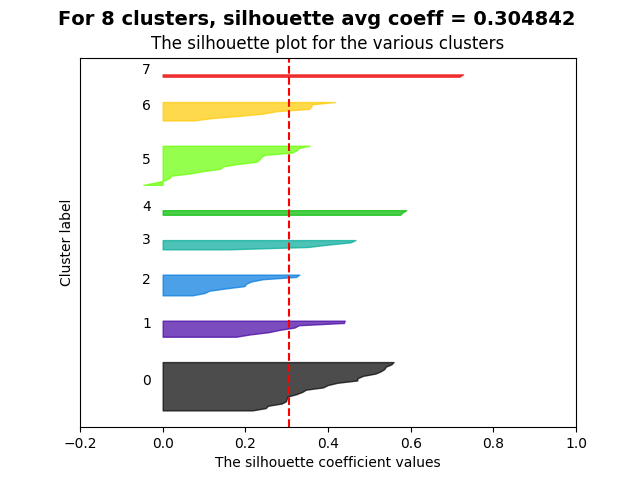

<IPython.core.display.Javascript object>


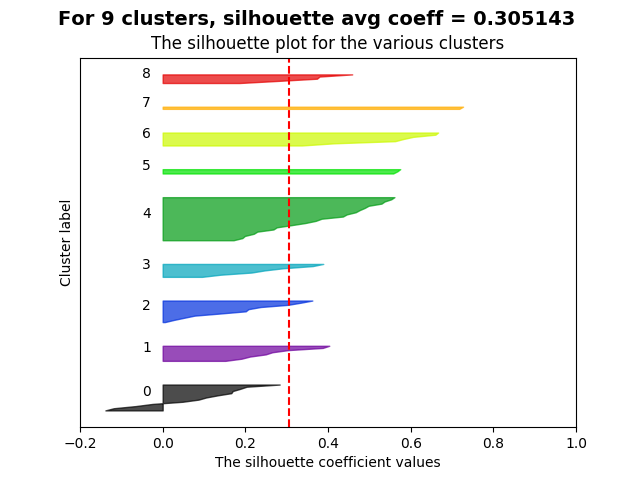

<IPython.core.display.Javascript object>


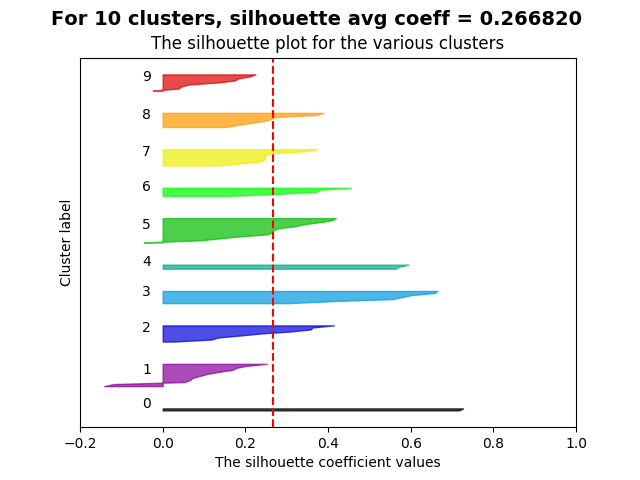

<IPython.core.display.Javascript object>


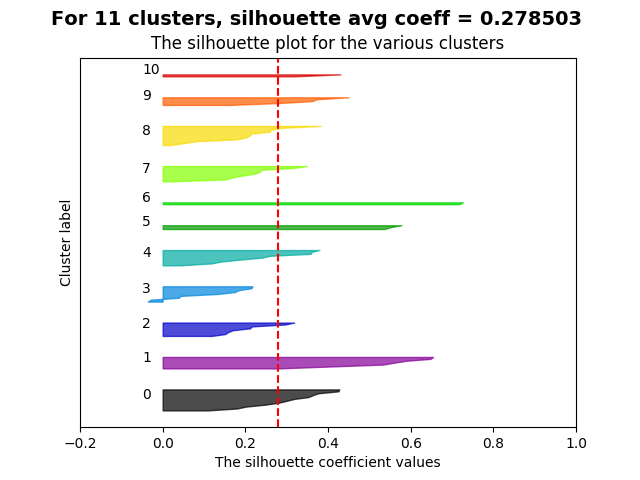

In [38]:
## Standard plotting code copied from sklearn documentation.
## Just change "X_matrix" to the data of your choice

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

### Just change this to your dataframe
X_matrix = std_cereals.values

range_n_clusters = [3, 4, 5, 6, 7, 8, 9, 10, 11]

for n_clusters in range_n_clusters:
    fig, (ax1) = plt.subplots()


    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_matrix)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_matrix, cluster_labels)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_matrix, cluster_labels)

    y_lower = 0
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("For %d clusters, silhouette avg coeff = %f " % (n_clusters,silhouette_avg)),
                 fontsize=14, fontweight='bold')
    plt.show()

### Note - Higher the silhouette score better the clustering.
Hence best K value for this dataset is 8-9

In [39]:
best_kmeans = KMeans(n_clusters=8, random_state=1240)
best_kmeans.fit(std_cereals)
best_kmeans_labels = best_kmeans.predict(std_cereals)

In [40]:
kmeans_results = pd.DataFrame({"label":cereal_label,"kmeans_cluster":best_kmeans_labels})
kmeans_results.head()

,label,kmeans_cluster
0,100%_Bran (3 - 68.4),4
1,100%_Natural_Bran (3 - 33.98),0
2,All-Bran (3 - 59.43),4
3,All-Bran_with_Extra_Fiber (3 - 93.7),4
4,Almond_Delight (3 - 34.38),1


### Add Cluster Labels to Original Data

In [41]:
cereals = pd.read_csv("Cereals.csv")
cereals['label'] = cereals['name']+ ' (' + cereals['shelf'].astype(str) + " - " + round(cereals['rating'],2).astype(str) + ')'
cereals.drop(['name','shelf','rating'], axis=1, inplace=True)

final_cluster_data = pd.merge(cereals, kmeans_results, on='label')
final_cluster_data.head(10)


,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups,label,kmeans_cluster
0,70,4,1,130,10.0,5.0,6.0,280.0,25,1.00,0.33,100%_Bran (3 - 68.4),4
1,120,3,5,15,2.0,8.0,8.0,135.0,0,1.00,1.00,100%_Natural_Bran (3 - 33.98),0
2,70,4,1,260,9.0,7.0,5.0,320.0,25,1.00,0.33,All-Bran (3 - 59.43),4
3,50,4,0,140,14.0,8.0,0.0,330.0,25,1.00,0.50,All-Bran_with_Extra_Fiber (3 - 93.7),4
4,110,2,2,200,1.0,14.0,8.0,NaN,25,1.00,0.75,Almond_Delight (3 - 34.38),1
5,110,2,2,180,1.5,10.5,10.0,70.0,25,1.00,0.75,Apple_Cinnamon_Cheerios (1 - 29.51),1
6,110,2,0,125,1.0,11.0,14.0,30.0,25,1.00,1.00,Apple_Jacks (2 - 33.17),1
7,130,3,2,210,2.0,18.0,8.0,100.0,25,1.33,0.75,Basic_4 (3 - 37.04),7
8,90,2,1,200,4.0,15.0,6.0,125.0,25,1.00,0.67,Bran_Chex (1 - 49.12),2
9,90,3,0,210,5.0,13.0,5.0,190.0,25,1.00,0.67,Bran_Flakes (3 - 53.31),2


In [42]:
final_cluster_data.shape

(77, 13)

In [43]:
final_cluster_data.kmeans_cluster.value_counts()

1    21
2    12
7    10
5    10
0     8
6     7
3     6
4     3
Name: kmeans_cluster, dtype: int64

### Post-Process Clusters 

In [44]:
analysis = final_cluster_data.groupby(['kmeans_cluster']).mean().reset_index()
analysis

,kmeans_cluster,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups
0,0,107.500000,3.500000,2.500000,99.375000,2.525000,11.500000,6.571429,119.375000,18.75,1.000000,0.583750
1,1,110.952381,1.476190,1.047619,166.190476,0.547619,12.547619,11.380952,45.250000,25.00,1.000000,0.875238
2,2,100.833333,3.250000,0.666667,208.333333,2.625000,15.791667,4.333333,102.083333,25.00,1.000000,0.824167
3,3,116.666667,2.666667,0.833333,208.333333,1.833333,18.166667,6.333333,95.833333,100.00,1.133333,0.958333
4,4,63.333333,4.000000,0.666667,176.666667,11.000000,6.666667,3.666667,310.000000,25.00,1.000000,0.386667
5,5,84.000000,2.500000,0.100000,9.500000,2.000000,15.900000,2.100000,90.555556,10.00,0.883000,0.864000
6,6,108.571429,1.857143,0.285714,261.428571,0.285714,21.571429,2.714286,36.428571,25.00,1.000000,1.054286
7,7,134.000000,3.200000,1.800000,180.500000,3.650000,15.250000,10.800000,174.000000,25.00,1.265000,0.735000


#### References:

* https://kapilddatascience.wordpress.com/2015/11/10/using-silhouette-analysis-for-selecting-the-number-of-cluster-for-k-means-clustering/
* https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering
* https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html